# Patient CC

Import libraries

In [2]:
from scipy.io      import loadmat
from ripser        import Rips
from fermat        import Fermat
from scipy.spatial import  distance_matrix

import matplotlib.pyplot as plt
import numpy             as np
import persim

#### The data is the recording of the iEEG recording of the brain activity for 9 channels (areas).

In [9]:
data = loadmat('data/row_data_CC_sezure_intra_0134.mat')['M_rdata_CC']
data = data[580000:640000, :].T

In [12]:
num_electrodes = data.shape[0]             # rows (i.e. electrodes) in the data matrix
n_samples = data.shape[1]                  # number of samples on each row (i.e. electrode's samples)
electrode_names = ['Channel %i'%(channel) for channel in range(N)]   # name or labels of the electrodes
t = range(n_samples)

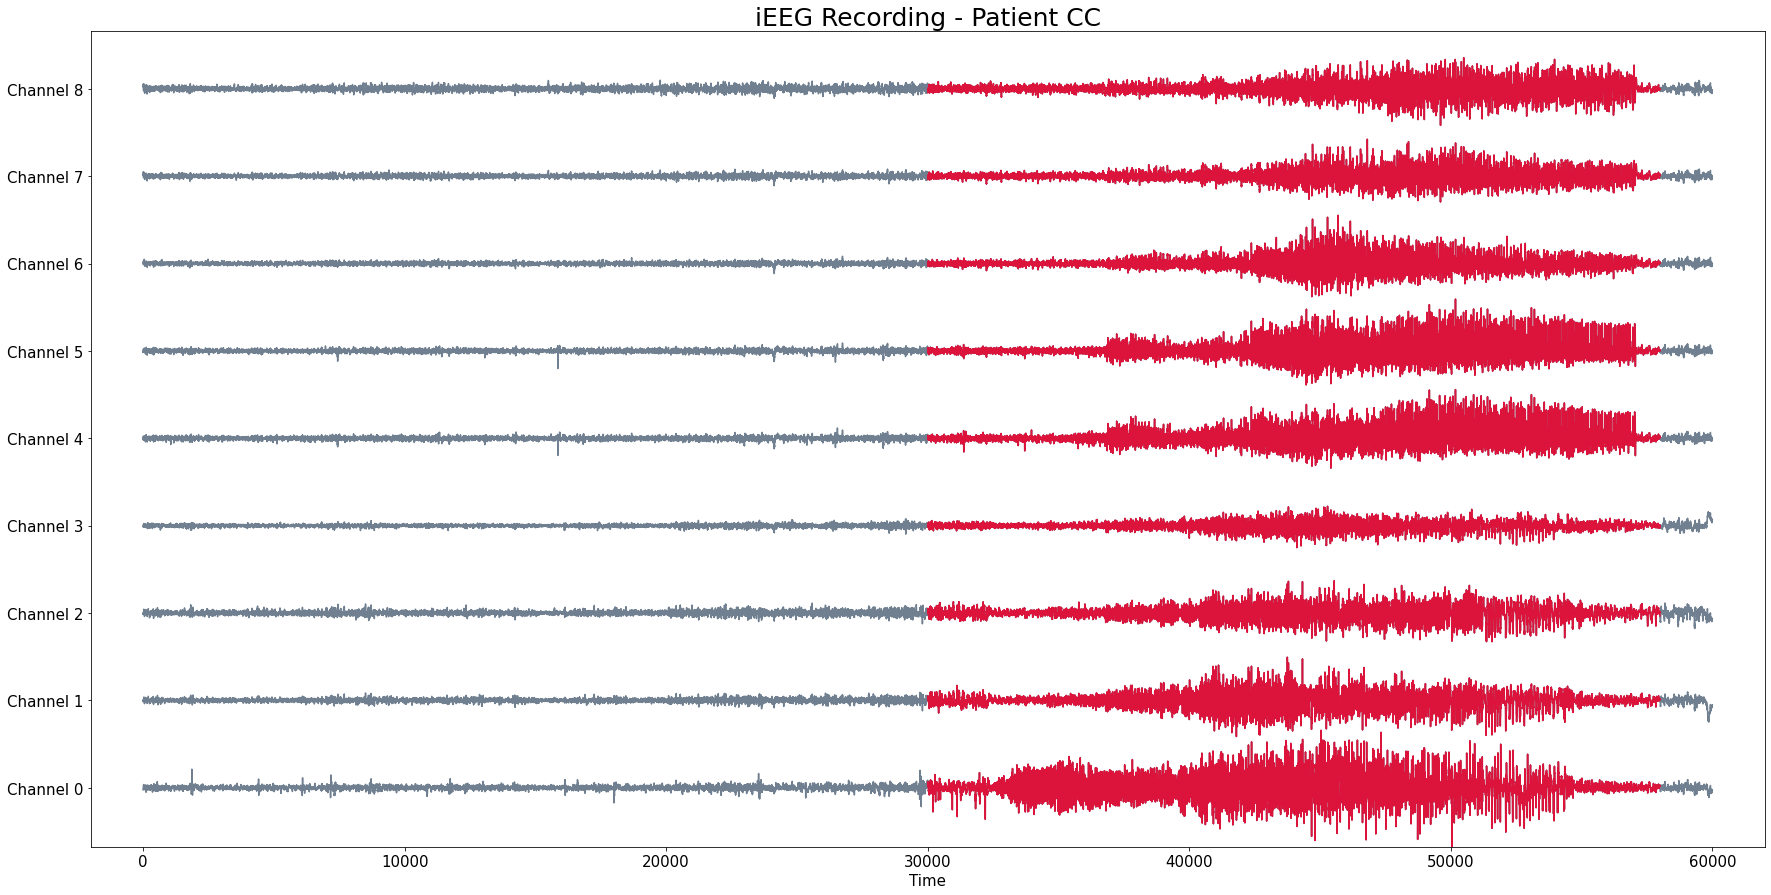

In [16]:
from matplotlib.collections import LineCollection
# create the 'figure'
fig = plt.figure("EEG samples",figsize=(30,15))

ticklocs = []
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-2000, n_samples+2000)
plt.xticks(fontsize=15)
data_min = data.min()
data_max = data.max()
dr = (data_max - data_min) * 0.75   #crowd it a bit
y0 = data_min
y1 = (num_electrodes -1) * dr + data_max
ax.set_ylim(y0, y1)

segs = []
for electrode in range(num_electrodes):
    segs.append(np.column_stack((t, data[electrode, :])))
    ticklocs.append(electrode * dr)
    
offsets = np.zeros((num_electrodes, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None, color = 'slategrey')
ax.add_collection(lines);

segs_red = []
for electrode in range(num_electrodes):
    segs_red.append(np.column_stack((range(30000,58000), data[electrode, 30000:58000])))

lines_red = LineCollection(segs_red, offsets=offsets, transOffset=None, color = 'crimson')
ax.add_collection(lines_red);

# Set the yticks to use axes coordinates on the y axis
ax.set_yticks(ticklocs)
ax.set_yticklabels(electrode_names, fontsize = 15)
plt.title('iEEG Recording - Patient CC', fontsize = 25)
ax.set_xlabel('Time', fontsize = 15)
plt.savefig('figures/CC_iEEG_seizure_bis.png');
plt.show();

We observe in red the interval of the epileptic seizure, according to the diagnostic of the doctor.

### Sliding Window Embedding

1000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


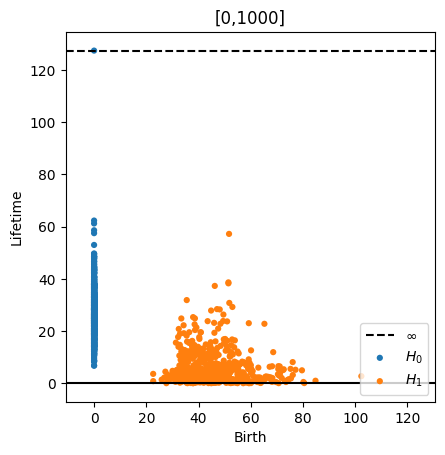

1100
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


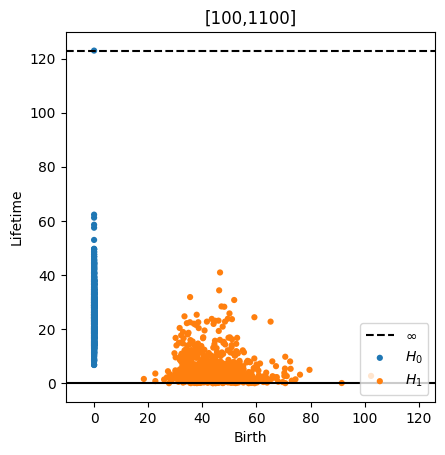

In [159]:
step = 100
window_size = 1000

for t in np.arange(window_size, 1200, step):
    print(t)
    window = data.T[t-window_size: t, :]
    diagram = rips.fit_transform(window)
    fig = plt.plot()
    rips = Rips()
    rips.plot(diagram, lifetime = True)
    plt.title('[%i,%i]'%(t-window_size,t))
    plt.savefig('figures/PH/PH_CC_Window[%s,%s].png'%(t-window_size,t),  bbox_inches='tight')
    plt.show()

1000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


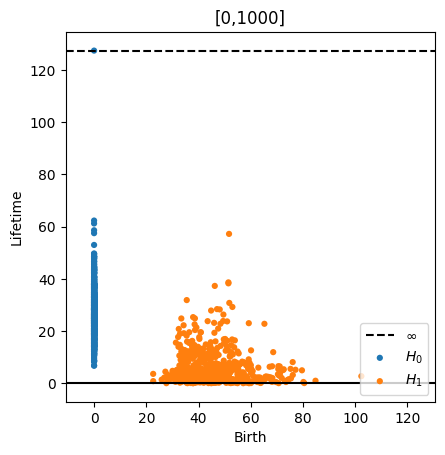

2000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


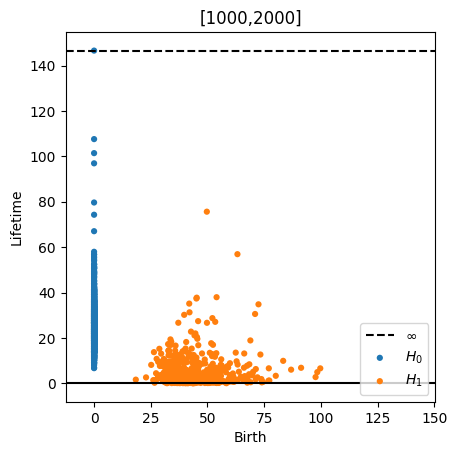

3000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


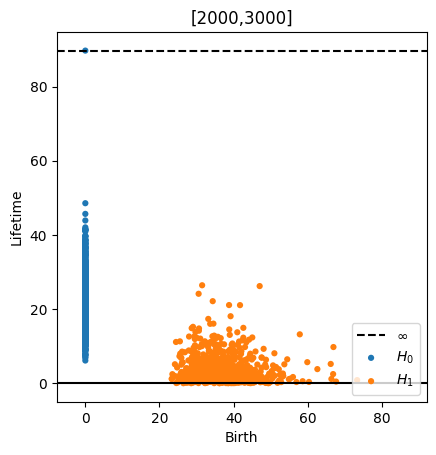

4000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


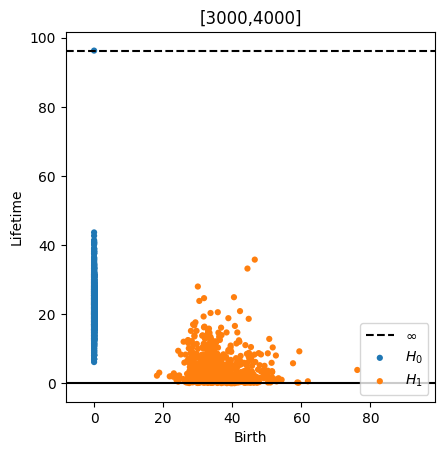

5000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


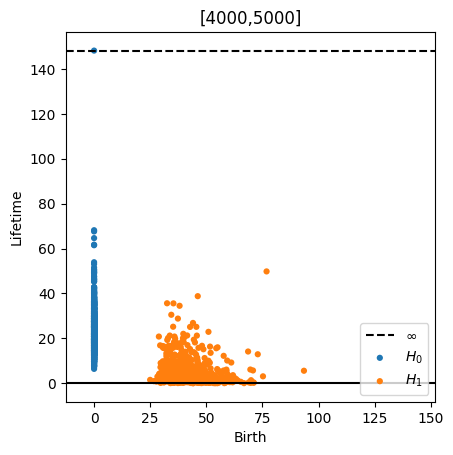

6000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


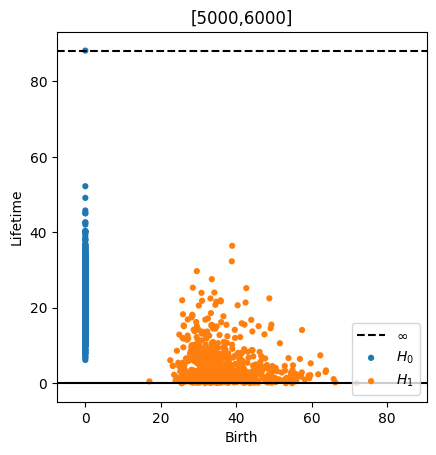

7000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


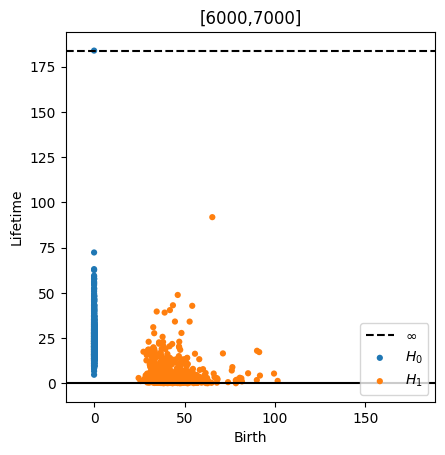

8000
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


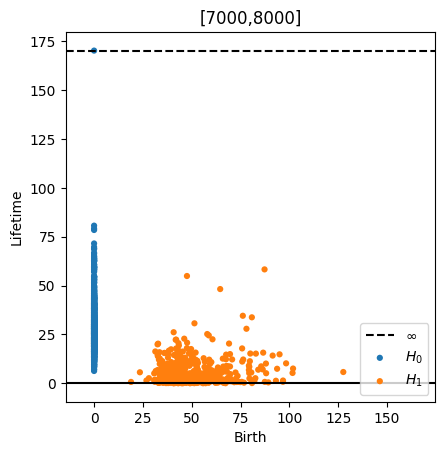

9000


KeyboardInterrupt: 

In [95]:
step = 1000
window_size = 1000

for t in np.arange(window_size, 60100, step):
    print(t)
    window = data.T[t-window_size: t, :]
    diagram = rips.fit_transform(window)
    fig = plt.plot()
    rips = Rips()
    rips.plot(diagram, lifetime = True)
    plt.title('[%i,%i]'%(t-window_size,t))
    plt.savefig('figures/PH/PH_CC_Window[%s,%s].png'%(t-window_size,t),  bbox_inches='tight')
    plt.show()

In [96]:
rips = Rips()
window_persistence_diagrams = {}
window_persistence_diagrams[0] = {}
window_persistence_diagrams[1] = {}
step = 100
window_size = 1000

for t in np.arange(window_size, 60100, step):
    print(t)
    window = data.T[t-window_size: t, :]
    diagram = rips.fit_transform(window)
    window_persistence_diagrams[0][t] = diagram[0]
    window_persistence_diagrams[1][t] = diagram[1]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
1770

### Consecutive Wasserstein distance

In [147]:
w_wasserstein = {}
for i in range(2):
    w_wasserstein[i] = {}
for i in range(2):
    for t in list(window_persistence_diagrams[0].keys())[1:]:
        w_wasserstein[i][t] = persim.wasserstein(window_persistence_diagrams[i][t], window_persistence_diagrams[i][t-step])

c:\users\ximel\appdata\local\programs\python\python36\lib\site-packages\persim\wasserstein.py:53: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  "ignoring those points"
c:\users\ximel\appdata\local\programs\python\python36\lib\site-packages\persim\wasserstein.py:63: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  "ignoring those points"
c:\users\ximel\appdata\local\programs\python\python36\lib\site-packages\persim\wasserstein.py:53: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  "ignoring those points"
c:\users\ximel\appdata\local\programs\python\python36\lib\site-packages\persim\wasserstein.py:63: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  "ignoring those points"
c:\users\ximel\appdata\local\programs\python\python36\lib\site-packages\persim\wasserstein.py:53: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  "ignoring

In [148]:
np.save('data/CC_w_wasserstein.npy', w_wasserstein)

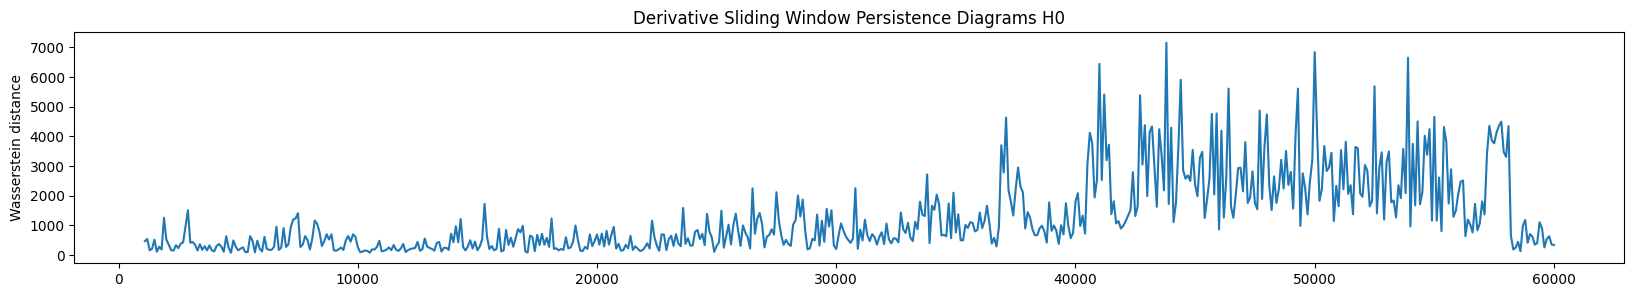

In [149]:
fig = plt.figure(figsize=(20,3))

plt.plot(list(window_persistence_diagrams[0].keys())[1:], w_wasserstein[0].values());
plt.ylabel('Wasserstein distance')
plt.title('Derivative Sliding Window Persistence Diagrams H0')
plt.savefig('figures/SW_CC_consecutive_distance_H0.png')

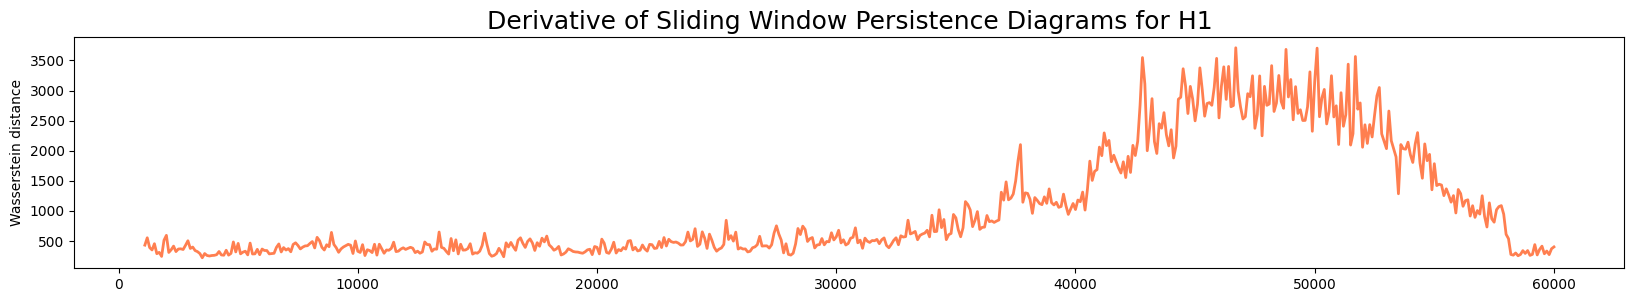

In [178]:
fig = plt.figure(figsize=(20,3))

plt.plot(list(window_persistence_diagrams[0].keys())[1:], w_wasserstein[1].values(), color = 'coral', lw = 2)
plt.ylabel('Wasserstein distance')
plt.title('Derivative of Sliding Window Persistence Diagrams for H1', fontsize = 18)
plt.savefig('figures/SW_CC_consecutive_distance_H1.png')

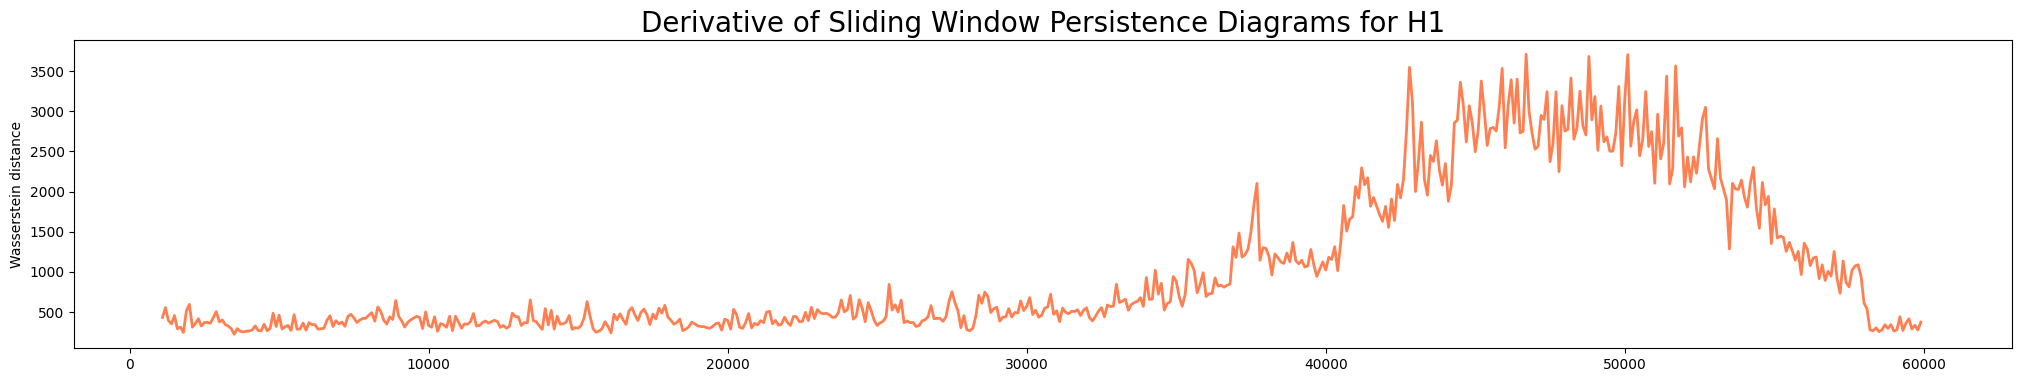

In [179]:
from matplotlib import animation

x = list(window_persistence_diagrams[0].keys())[1:]
y = list(w_wasserstein[1].values())
fig, ax = plt.subplots(figsize=(25,4))
line, = ax.plot(x, y, color='coral', lw = 2)
plt.title('Derivative of Sliding Window Persistence Diagrams for H1', fontsize = 20)
plt.ylabel('Wasserstein distance')


def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=1, blit=True)
# Save
Writer = animation.writers['ffmpeg']
writer = Writer(fps=12.5, metadata=dict(artist='Me'), bitrate=1800)

ani.save('Derivative_CC.mp4', writer = writer, dpi=150)

In [180]:
ani.save('Derivative_CC.gif', writer = writer, dpi=150)

In [151]:
w_persistence = {}
w_std = {}
w_mean = {}
w_sum = {}
w_mean_death1 = {}

for i in range(2):
    w_persistence[i] = {}
    w_mean[i] = {}
    w_std[i] = {}  
    w_sum[i] = {}

for t in window_persistence_diagrams[0].keys():
    w_persistence[0][t] = np.sort(window_persistence_diagrams[0][t][:,1]-window_persistence_diagrams[0][t][:,0])[:-1]
    w_persistence[1][t] = np.sort(window_persistence_diagrams[1][t][:,1]-window_persistence_diagrams[1][t][:,0])
    w_mean_death1[t] = window_persistence_diagrams[1][t][:,1].mean()
    for i in range(2):
        w_mean[i][t] = w_persistence[i][t].mean()
        w_std[i][t] = w_persistence[i][t].std()
        w_sum[i][t] = w_persistence[i][t].sum()

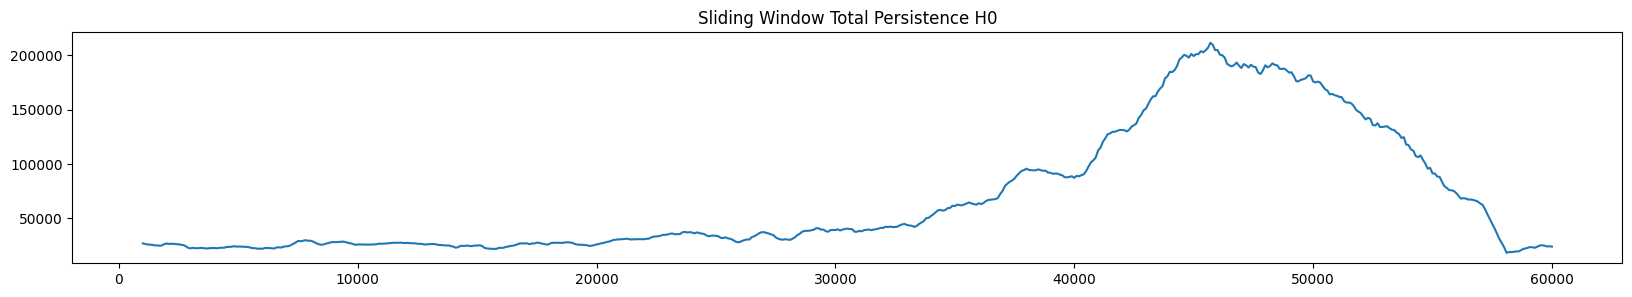

In [152]:
fig = plt.figure(figsize=(20,3))

plt.plot(window_persistence_diagrams[0].keys(), w_sum[0].values());
plt.title('Sliding Window Total Persistence H0');
plt.savefig('figures/SW_CC_total_persistence_H0.png')

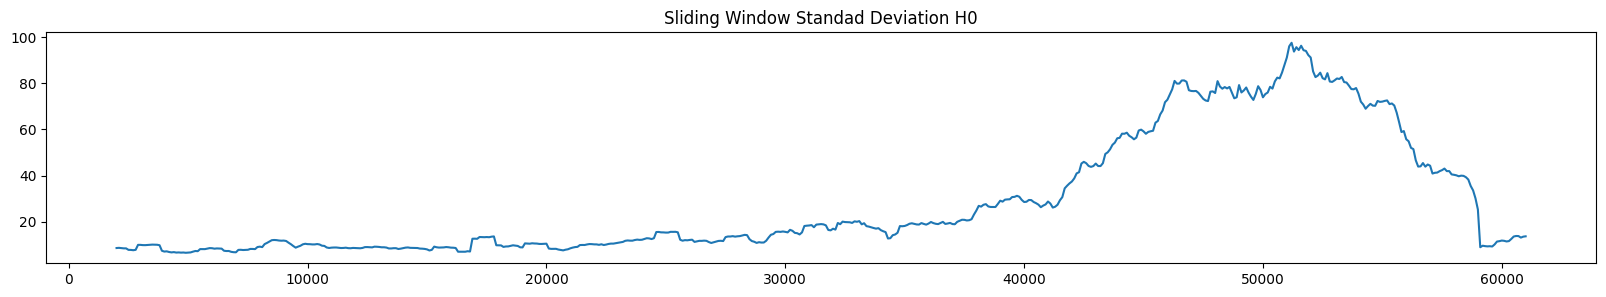

In [153]:
fig = plt.figure(figsize=(20,3))

plt.plot(np.array(list(window_persistence_diagrams[0].keys()))+1000, w_std[0].values());
plt.title('Sliding Window Standad Deviation H0');

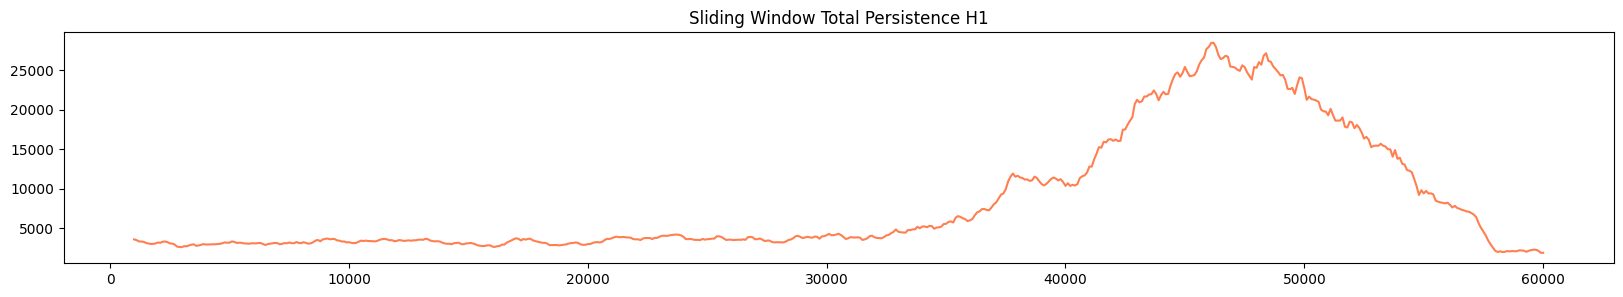

In [154]:
fig = plt.figure(figsize=(20,3))

plt.plot(np.array(list(window_persistence_diagrams[1].keys())), w_sum[1].values(), color = 'coral');
plt.title('Sliding Window Total Persistence H1');
plt.savefig('figures/SW_CC_total_persistence_H1.png')

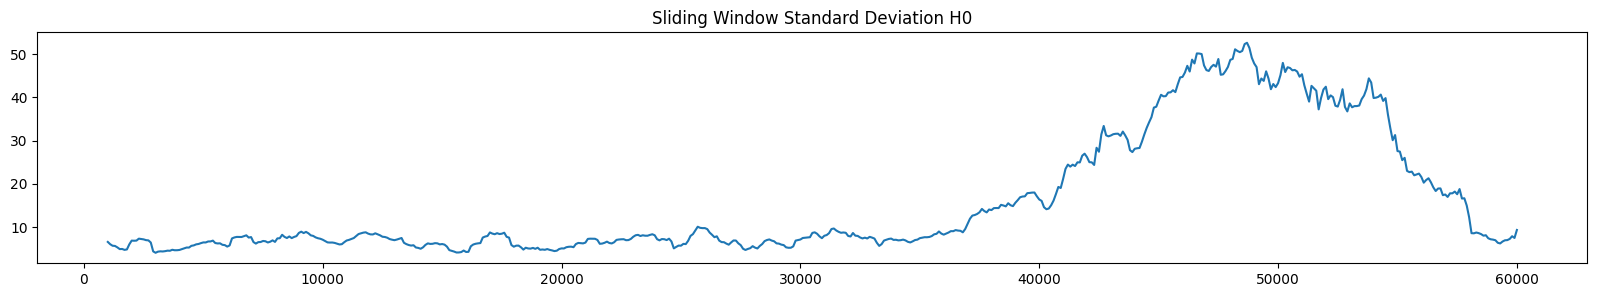

In [155]:
fig = plt.figure(figsize=(20,3))

plt.plot(np.array(list(window_persistence_diagrams[0].keys())), w_std[1].values());
plt.title('Sliding Window Standard Deviation H0');

#### Entropy

In [142]:
from gtda.diagrams   import PersistenceEntropy
from gtda.homology import VietorisRipsPersistence

PE = PersistenceEntropy()
VR = VietorisRipsPersistence(homology_dimensions=[0, 1], metric = 'precomputed') 
entropy = {}
entropy[0] = {}
entropy[1] = {}


step = 100
window_size = 1000
start = 0
for t in np.arange(window_size, 60000, step):
    window = data[t-window_size:t, :]
    matrix = distance_matrix(window, window)
    diagram = VR.fit_transform(matrix[None, :,:])
    ent = PE.fit_transform(diagram)
    for i in range(2):
        entropy[i][t] = ent[0][i]

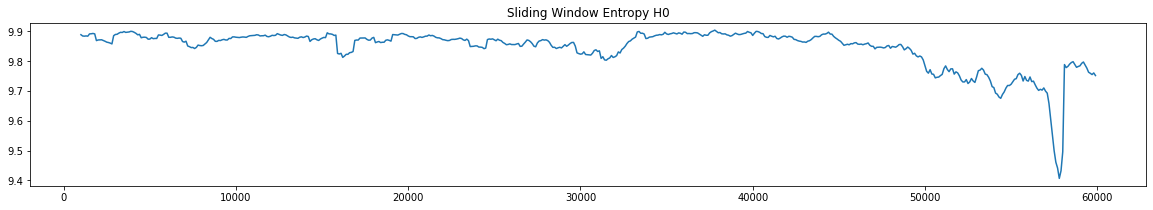

In [162]:
fig = plt.figure(figsize=(20,3))

plt.plot(np.array(list(entropy[0].keys())), entropy[0].values());
plt.title('Sliding Window Entropy H0');
plt.savefig('figures/SW_CC_entropy_H0.png')

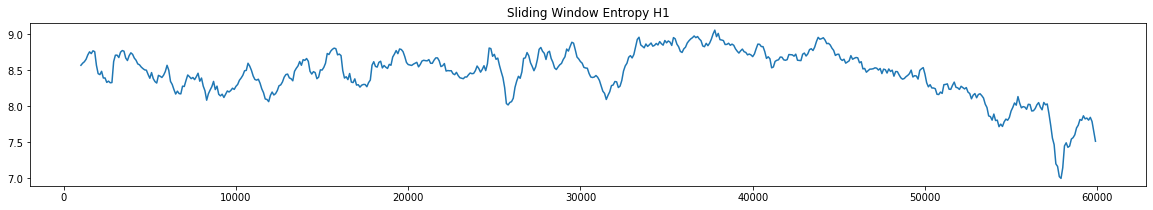

In [161]:
fig = plt.figure(figsize=(20,3))

plt.plot(np.array(list(entropy[1].keys())), entropy[1].values());
plt.title('Sliding Window Entropy H1');
plt.savefig('figures/SW_CC_entropy_H1.png')